## Analyzing customer spending bahaviour to provide promotional offers to the potential customers of Central Mall

In [5]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [9]:
data= pd.read_csv(r"C:\Users\Dell\Desktop\Learnbay\Learnbay\9 june\Machine Learning\Cust_Spend_Data.csv")

In [41]:
data

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [11]:
data.value_counts()

Cust_ID  Name  Avg_Mthly_Spend  No_Of_Visits  Apparel_Items  FnV_Items  Staples_Items
1        A     10000            2             1              1          0                1
2        B     7000             3             0              10         9                1
3        C     7000             7             1              3          4                1
4        D     6500             5             1              1          4                1
5        E     6000             6             0              12         3                1
6        F     4000             3             0              1          8                1
7        G     2500             5             0              11         2                1
8        H     2500             3             0              1          1                1
9        I     2000             2             0              2          2                1
10       J     1000             4             0              1          7                1
Name

In [13]:
fdata=data.drop(columns=["Cust_ID","Name"])

In [15]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Avg_Mthly_Spend  10 non-null     int64
 1   No_Of_Visits     10 non-null     int64
 2   Apparel_Items    10 non-null     int64
 3   FnV_Items        10 non-null     int64
 4   Staples_Items    10 non-null     int64
dtypes: int64(5)
memory usage: 532.0 bytes


In [24]:
from sklearn.preprocessing import scale

data1=scale(fdata)

Standarddata=pd.DataFrame(data1)

In [25]:
Standarddata

,0,1,2,3,4
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


In [80]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    parameters=KMeans(n_clusters=i,init="k-means++", random_state=66)
    parameters.fit(Standarddata)
    wcss.append(parameters.inertia_)


Text(0, 0.5, 'WCSS')

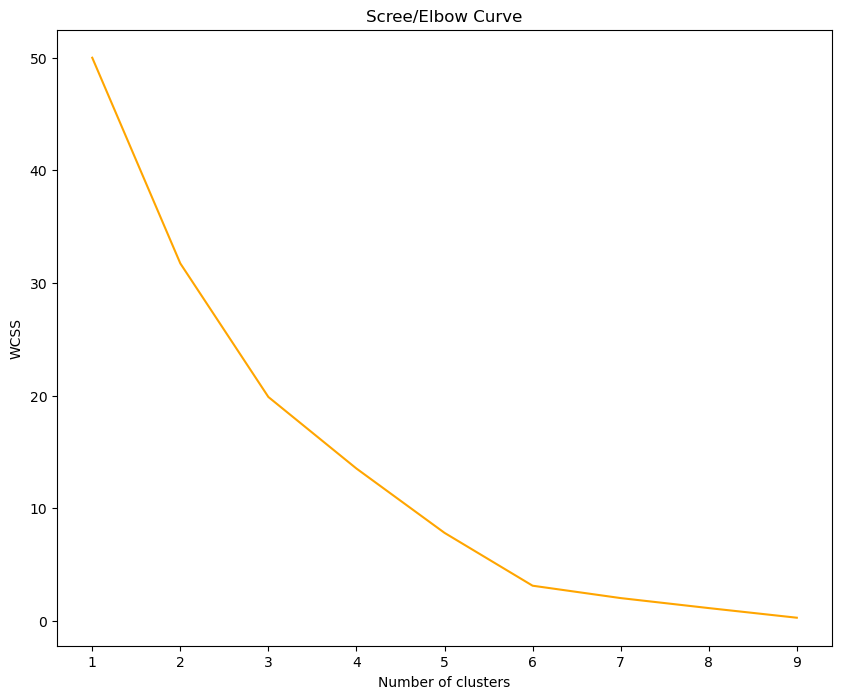

In [83]:
wcssdata=pd.DataFrame(data=wcss, index=range(1,10), columns=['WCSS Error'])

plt.figure(figsize=(10,8))
sns.lineplot(x=range(1,10), y=wcssdata["WCSS Error"],color="orange")
plt.title("Scree/Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

The curve shows the first elbow at n_clusters =3, so we shall train our final model at this parameter.

In [84]:
parameters=KMeans(n_clusters=3,init="k-means++", random_state=66)
y_kmeans=parameters.fit_predict(Standarddata)

y_kmeansf=y_kmeans+1

cluster=pd.DataFrame(y_kmeansf)
data["Cluster"]=cluster

data


,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Cluster
0,1,A,10000,2,1,1,0,2
1,2,B,7000,3,0,10,9,1
2,3,C,7000,7,1,3,4,2
3,4,D,6500,5,1,1,4,2
4,5,E,6000,6,0,12,3,1
5,6,F,4000,3,0,1,8,3
6,7,G,2500,5,0,11,2,1
7,8,H,2500,3,0,1,1,3
8,9,I,2000,2,0,2,2,3
9,10,J,1000,4,0,1,7,3


In [85]:
kmeans_mean_cluster=pd.DataFrame(round(data.iloc[:,2:].groupby("Cluster").mean(),1))
kmeans_mean_cluster

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
Cluster,,,,,
1,5166.7,4.7,0.0,11.0,4.7
2,7833.3,4.7,1.0,1.7,2.7
3,2375.0,3.0,0.0,1.2,4.5


It can be seen from the above chart that customers elonging to cluster 2 are spending the most and they are the Apparel_Item buyers (From which Cental Mall generates more revenue) 

As Central Mall management should target cluster 2 customers for offering their promotional offers

Further, they can also tagert customers from cluster 1, as they can be  potential apperal item buyers, if offered a  promotional combo offer containg food and vegentables items clubbed with appearal items.

In [86]:
data

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Cluster
0,1,A,10000,2,1,1,0,2
1,2,B,7000,3,0,10,9,1
2,3,C,7000,7,1,3,4,2
3,4,D,6500,5,1,1,4,2
4,5,E,6000,6,0,12,3,1
5,6,F,4000,3,0,1,8,3
6,7,G,2500,5,0,11,2,1
7,8,H,2500,3,0,1,1,3
8,9,I,2000,2,0,2,2,3
9,10,J,1000,4,0,1,7,3
